In [1]:
import os

In [3]:
#!pip install google-genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.5/218.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.9/100.9 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.1/216.1 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.2.2
    Uninstalling tenacity-8.2.2:
      Successfully uninstalled tenacity-8.2.2
  Attempting uninstall: anyio
    Found existing installation: anyio 4.2.0
    Uninstalling anyio-4.2.0:
      Successfully uninstalled anyio-4.2.0
  Attempting uninstall: httpx
    Found existing installation: httpx 0.26.0
    Uninstalling httpx-0.26.0:
      Successfully uninstalled httpx-0.26.0


In [88]:
from google import genai
from PIL import Image

In [49]:
import matplotlib.pyplot as plt

In [165]:
import pandas as pd

In [5]:
model="gemma-3-27b-it"

In [7]:
img_path = "/Users/zainabsiddiqui/Downloads/Data_Problems/LLM_Project/Data/test.png"

In [9]:
REQUEST = "Identify and count the shapes in this image"

In [19]:
client = genai.Client()

#image = Image.open(img_path)

#response = client.models.generate_content(
#  model=model,
#  contents=[image, REQUEST],
#  )

#print(response.text) # The output often is markdown

Here's a breakdown of the shapes in the image:

*   **Circles:** There are 3 circles (blue, yellow, and turquoise).
*   **Rectangle:** There is 1 rectangle (gray).

**Total:** 4 shapes.


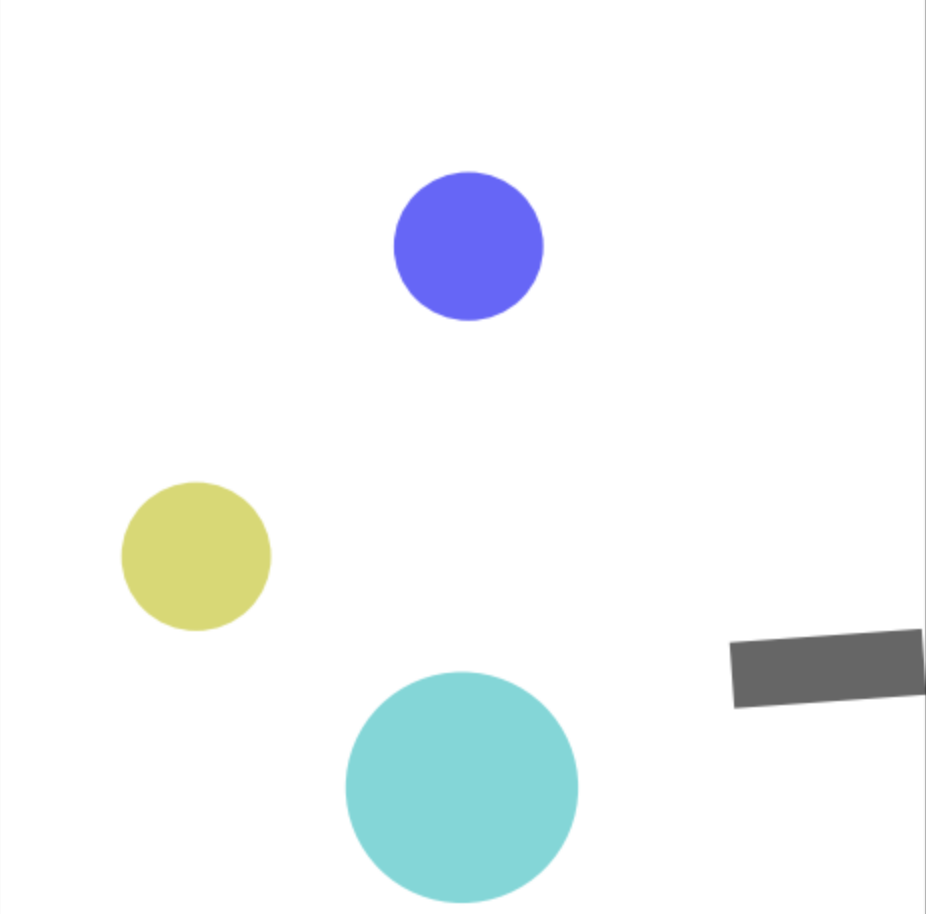

In [21]:
image

    Answer was exactly correct. Too easy?

In [11]:
img_path = "/Users/zainabsiddiqui/Downloads/Data_Problems/LLM_Project/Data/test2.png"

In [13]:
client = genai.Client()

In [21]:
image = Image.open(img_path)

response = client.models.generate_content(
  model=model,
  contents=[image, REQUEST],
  )

print(response.text) # The output often is markdown

Here's a breakdown of the shapes in the image and their counts:

*   **Circles:** 4 (one gray, one yellow, one red, one blue)
*   **Squares/Rectangles:** 6 (various colors)
*   **Triangles:** 3 (one red inside a circle, two purple)

**Total Shapes:** 13


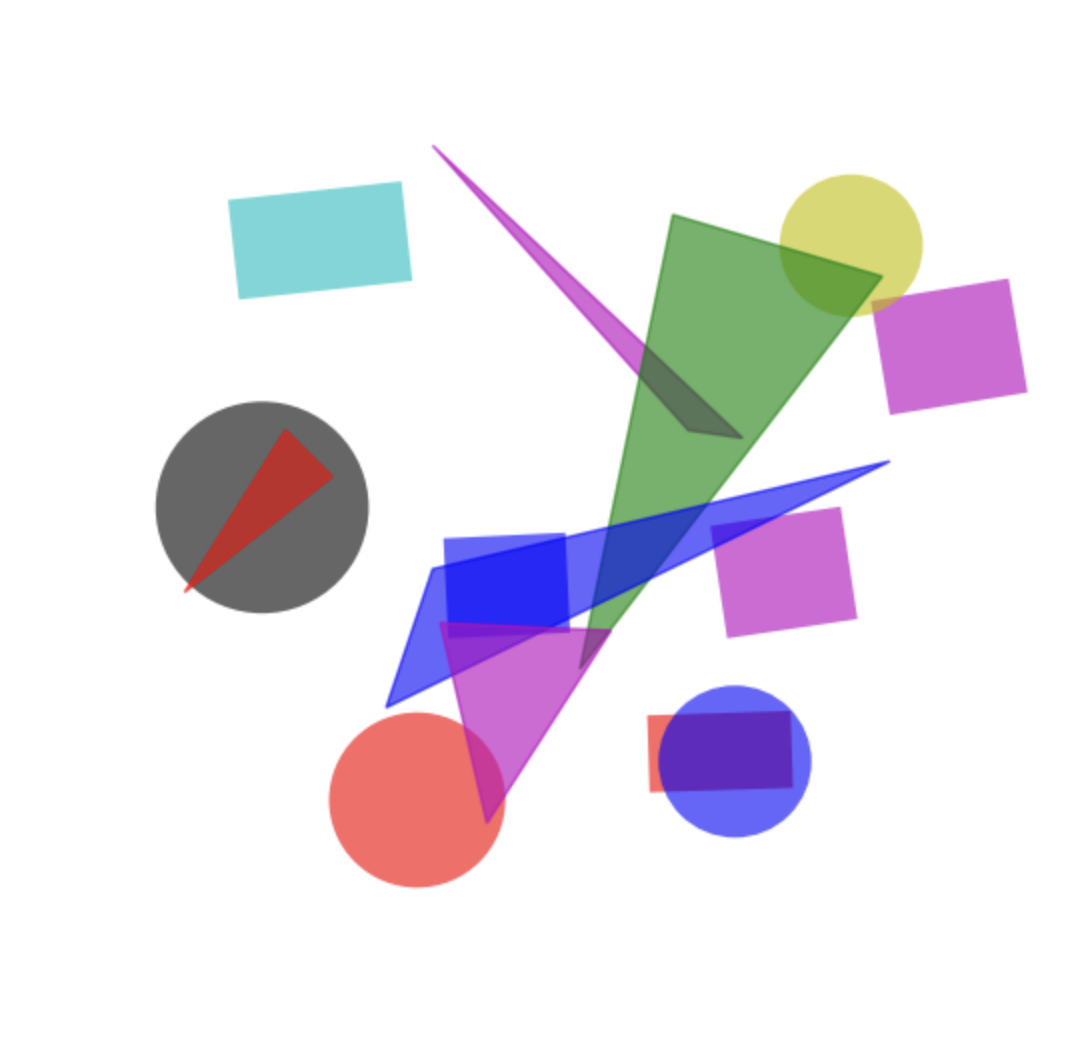

In [22]:
image

    Incorrect number of rectangles & triangles

True counts:
* 4 circles
* 5 rectangles
 * 5 triangles


In [29]:
img_path = "/Users/zainabsiddiqui/Downloads/Data_Problems/LLM_Project/Data/r3_c5_t2.png"

In [31]:
image = Image.open(img_path)

response = client.models.generate_content(
  model=model,
  contents=[image, REQUEST],
  )

print(response.text) # The output often is markdown

Here's a breakdown of the shapes in the image and their counts:

*   **Circles:** 4 (3 green, 1 blue)
*   **Triangles:** 2 (both turquoise/light blue)
*   **Rectangles:** 3 (2 blue, 1 gray)

So, in total, there are **9** shapes in the image.


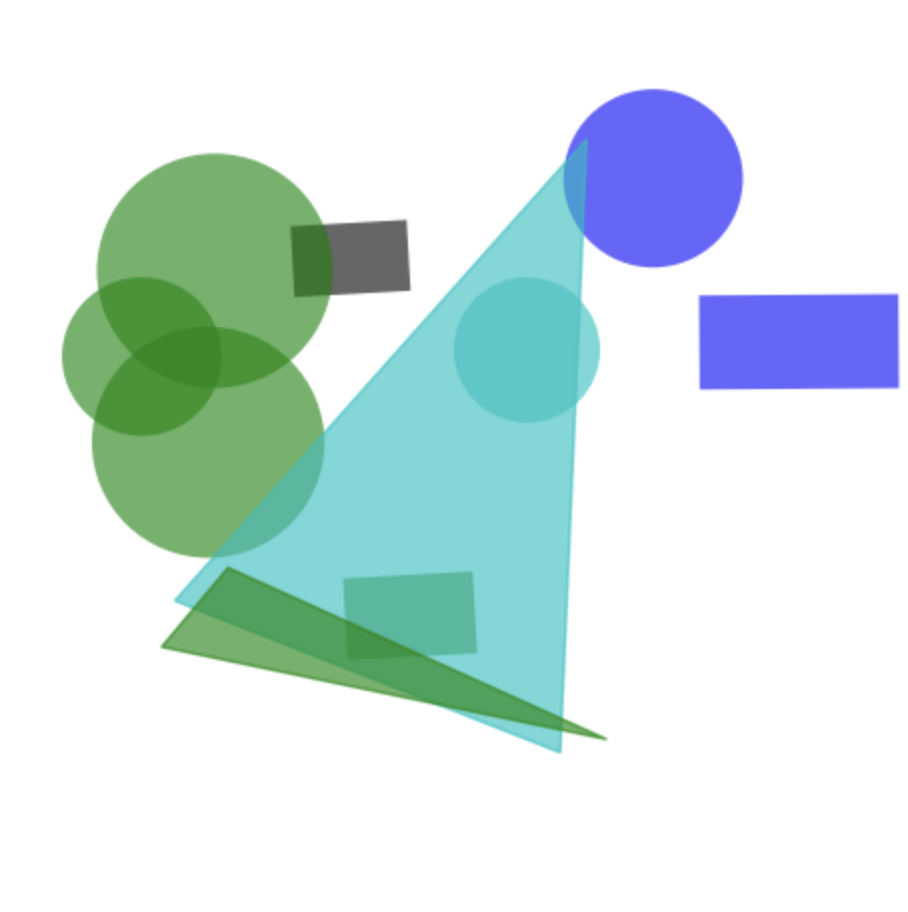

In [32]:
image

    Incorrect triangle color
    Missed a circle
    Incorrect rectangle color(?)

In [39]:
REQUEST

'Identify and count the shapes in this image'

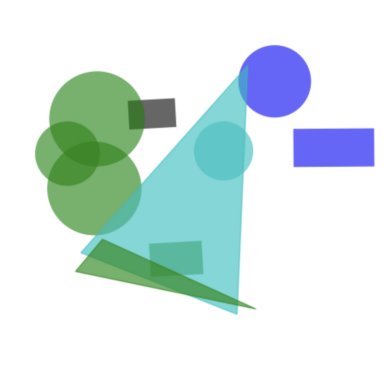

In [53]:
plt.imshow(image)
plt.axis("off")
plt.show()

In [145]:
def get_response(image_path, show=True,
                 model="gemma-3-27b-it",
                 REQUEST="Identify and count the shapes in this image",):
    image = Image.open(image_path)

    response = client.models.generate_content(
      model=model,
      contents=[image, REQUEST],
      )
    
    print(response.text) # The output often is markdown

    #move image after it's tested
    image_path_sep = image_path.split("/") 
    new_path=""
    for dir in image_path_sep[:-1]:
        new_path += f"/{dir}"

    new_path+=f"/Used/{image_path_sep[-1]}"
    
    os.rename(image_path,new_path)

    if show:
        plt.figure(frameon=False)
        plt.imshow(image)
        plt.axis(False)
        plt.show()

In [62]:
os.listdir(f"{os.getcwd()}/Data",)

['r3_c5_t2.png', 'test2.png', 'test.png', 'r3_c2_t3.png', 'r0_c1_t5.png']

Here's a breakdown of the shapes in the image and their counts:

*   **Triangles:** 8
*   **Circles:** 1

Therefore, there are a total of **9** shapes in the image.


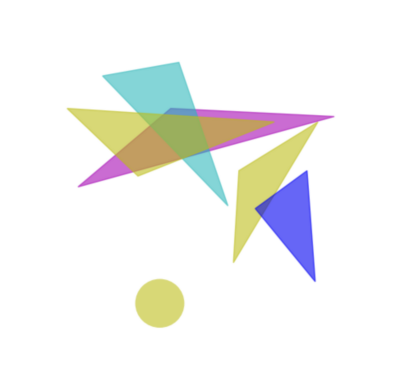

In [57]:
get_response("/Users/zainabsiddiqui/Downloads/Data_Problems/LLM_Project/Data/r0_c1_t5.png")

    May be counting subsections created by overlapping shapes?

In [68]:
cwd = os.getcwd()
print(cwd)

/Users/zainabsiddiqui/Downloads/Data_Problems/LLM_Project


In [72]:
data_dir = f"{cwd}/Data"
data_dir

'/Users/zainabsiddiqui/Downloads/Data_Problems/LLM_Project/Data'

Here's a breakdown of the shapes identified in the image and their counts:

*   **Circles:** 3
*   **Squares/Rectangles:** 3
*   **Triangles:** 3

**Total Shapes:** 9


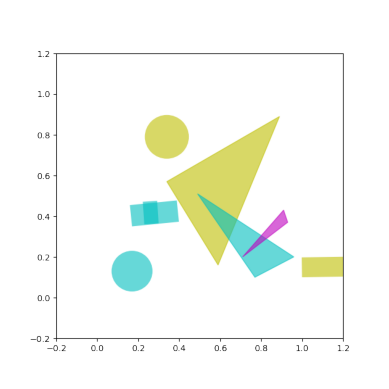

In [74]:
get_response(f"{data_dir}/r3_c2_t3.png",)

    Wrong number of circles

In [93]:
data_dir

'/Users/zainabsiddiqui/Downloads/Data_Problems/LLM_Project/Data'

In [101]:
image_path_sep = img_path.split("/")
image_path_sep

['',
 'Users',
 'zainabsiddiqui',
 'Downloads',
 'Data_Problems',
 'LLM_Project',
 'Data',
 'r3_c5_t2.png']

In [107]:
image_path_sep.pop(0)
image_path_sep

['Users',
 'zainabsiddiqui',
 'Downloads',
 'Data_Problems',
 'LLM_Project',
 'Data',
 'r3_c5_t2.png']

In [115]:
image_path_sep

['Users',
 'zainabsiddiqui',
 'Downloads',
 'Data_Problems',
 'LLM_Project',
 'Data',
 'r3_c5_t2.png']

In [105]:
image_path_sep[-2]

'Data'

In [131]:
new_path = ""
for dir in image_path_sep[:-1]:
    print(dir)
    new_path += f"/{dir}"

new_path

Users
zainabsiddiqui
Downloads
Data_Problems
LLM_Project
Data


'/Users/zainabsiddiqui/Downloads/Data_Problems/LLM_Project/Data'

In [133]:
new_path+=f"/Used/{image_path_sep[-1]}"

In [135]:
new_path

'/Users/zainabsiddiqui/Downloads/Data_Problems/LLM_Project/Data/Used/r3_c5_t2.png'

Here's a breakdown of the shapes identified in the image and their counts:

*   **Circles:** 6
*   **Squares/Rectangles:** 3

**Total Shapes:** 9

Users
zainabsiddiqui
Downloads
Data_Problems
LLM_Project
Data


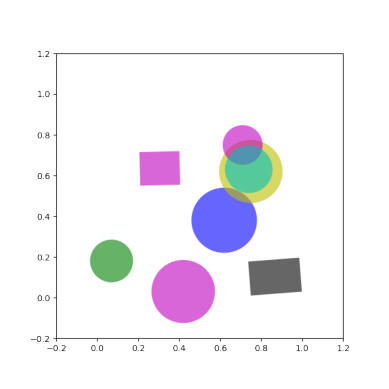

In [143]:
get_response(f"{data_dir}/r2_c6_t0.png")

    Incorrect number of rectangles

Here's a breakdown of the shapes in the image and their counts:

*   **Triangles:** 3
*   **Rectangles:** 4
*   **Circles:** 3

So, there are a total of **10** shapes in the image.


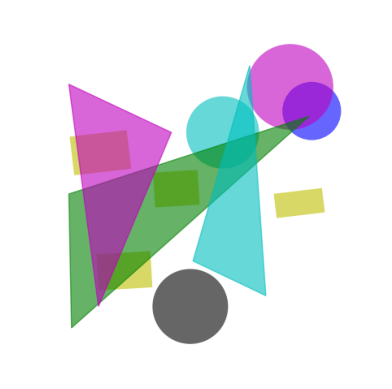

In [158]:
get_response(f"{data_dir}/r4_c4_t3.png")

    Missed a circle

Here's a breakdown of the shapes in the image and their counts:

*   **Circles:** 6
*   **Rectangles:** 5
*   **Triangles:** 2
*   **Lines:** 1

**Total Shapes:** 14


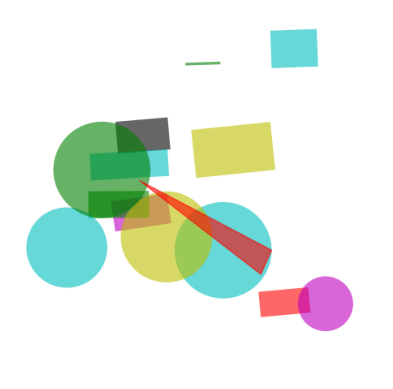

In [163]:
get_response(f"{data_dir}/r8_c5_t1.png")

Here's a breakdown of the shapes in the image and their counts:

*   **Circles:** 4 (blue, green, pink, and a dark grey/black)
*   **Squares/Rectangles:** 3 (a light blue square, a dark grey/black square, and a light yellow rectangle)
*   **Triangles:** 3 (two green triangles and a blue triangle)

**Total Shapes:** 10


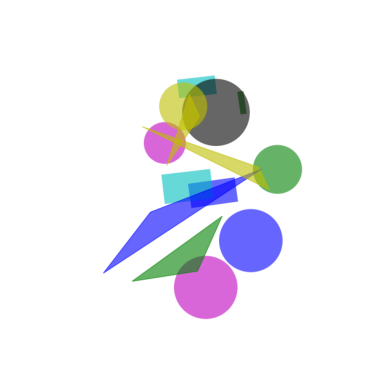

In [189]:
get_response(f"{data_dir}/r4_c6_t4.png")

    Wrong on multiple counts

In [193]:
! cd Data && ls *.png

r0_c2_t7.png r2_c2_t5.png r4_c4_t2.png r4_c7_t5.png r5_c8_t3.png r7_c6_t2.png
r0_c6_t3.png r2_c4_t2.png r4_c4_t5.png r5_c4_t0.png r6_c6_t0.png r7_c6_t3.png
r0_c8_t5.png r2_c6_t2.png r4_c6_t2.png r5_c5_t4.png r6_c7_t2.png r8_c1_t2.png
r2_c0_t7.png r3_c4_t4.png r4_c7_t1.png r5_c6_t1.png r7_c1_t2.png r8_c4_t4.png


Here's a breakdown of the shapes in the image and their counts:

*   **Circles:** 4 (red, green, yellow, and a partially overlapping light blue/yellow)
*   **Squares:** 3 (orange, light blue, and a small purple)
*   **Rectangles:** 2 (yellow and purple)
*   **Small Square:** 1 (teal)

**Total Shapes:** 10


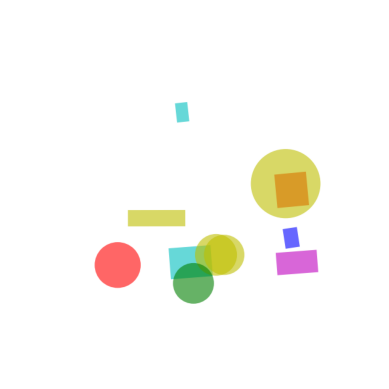

In [195]:
get_response(f"{data_dir}/r6_c6_t0.png")

In [183]:
responses=pd.DataFrame(columns=["pic_id","LLM_response","score"])

In [185]:
responses

,pic_id,LLM_response


In [202]:
REQUEST

'Identify and count the shapes in this image'